In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
!ls -l Resources/

total 2592
-rw-rw-r--@ 1 shadeetabasi  staff  745472 Feb  3 09:46 hawaii.sqlite
-rw-rw-r--@ 1 shadeetabasi  staff  574856 Feb  3 09:46 hawaii_measurements.csv
-rw-rw-r--@ 1 shadeetabasi  staff     618 Feb  3 09:46 hawaii_stations.csv


In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(engine, reflect=True) 


In [14]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [17]:
Base.metadata

MetaData(bind=None)

In [18]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [51]:
measurement_columns = inspector.get_columns('measurement')
print('measurement')
for c in measurement_columns:
    print(c['name'], c['type'])

print()
station_columns = inspector.get_columns('station')
print('station')
for c in station_columns:
    print(c['name'], c['type'])

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
# Create our session (link) from Python to the DB
session = Session(bind=engine) 


# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
result = engine.execute("select max(date) from measurement").fetchall()
latest_date = result[0][0]
latest_date

'2017-08-23'

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last_year_data = engine.execute('select * from measurement where date > "2016-08-23"').fetchall()
print(last_year_data[:2])

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0), (2366, 'USC00519397', '2016-08-25', 0.08, 80.0)]


In [57]:
df

,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0
2016-08-28,2369,USC00519397,0.01,78.0
...,...,...,...,...
2017-08-19,19546,USC00516128,0.09,71.0
2017-08-20,19547,USC00516128,NaN,78.0
2017-08-21,19548,USC00516128,0.56,76.0


Text(0, 0.5, 'inches')

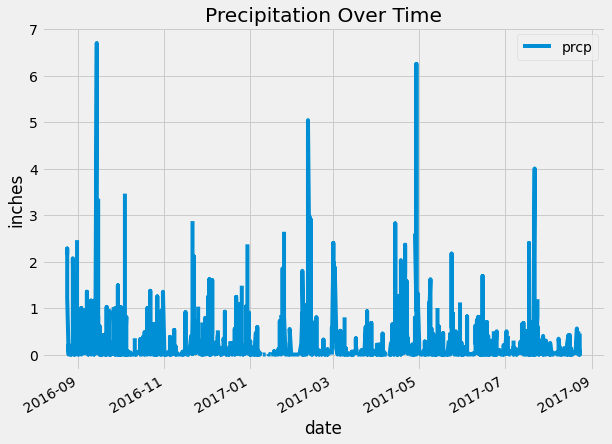

In [75]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_data, columns= ['id', 'station', 'date', 'prcp', 'tobs'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True,)

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data

#Plot gallons of alcohol over time for all states
df.plot( y='prcp', title="Precipitation Over Time", figsize=(9,7))
plt.ylabel('inches')

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
#count unique

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [76]:
# Close Session
session.close()